In [92]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
requests.__version__
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [93]:
!pip install citipy

In [94]:
# Import the API key.
#from config import weather_api_key
weather_api_key = "14d74e63ae16c29d1de534c67d90e2fe"

In [95]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [96]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [97]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [98]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [99]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

riverton us
esperance au
coquimbo cl
atuona pf
ostrovnoy ru
vaini to
puerto ayora ec
ust-kuyga ru
fortuna us
cape town za
rikitea pf
khash ir
jamestown sh
kursavka ru
hilo us
westport ie
rikitea pf
lasa cn
victoria sc
sao filipe cv
mys shmidta ru
guerrero negro mx
broome au
jamestown sh
hofn is
mar del plata ar
georgetown sh
samusu ws
catemaco mx
nouadhibou mr
yulara au
hamilton bm
roald no
mackay au
birganj np
halifax ca
kavaratti in
road town vg
port elizabeth za
camara de lobos pt
west bay ky
kahului us
adrar dz
castro cl
rock falls us
aripuana br
prieska za
vardo no
port alfred za
amderma ru
barrow us
cape town za
provideniya ru
namatanai pg
rockport us
denpasar id
busselton au
taolanaro mg
fortuna us
illoqqortoormiut gl
east london za
ancud cl
salinas ec
hobart au
kaitangata nz
tuatapere nz
kahului us
nome us
klaksvik fo
galle lk
balimo pg
ngukurr au
samusu ws
port alfred za
ambilobe mg
deputatskiy ru
hilo us
punta arenas cl
hauterive ca
punta arenas cl
bredasdorp za
taicheng cn
b

In [100]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [101]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d74e63ae16c29d1de534c67d90e2fe


In [102]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d74e63ae16c29d1de534c67d90e2fe&q=Boston


In [103]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [104]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [105]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [106]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":73.08,"feels_like":64.38,"temp_min":71.01,"temp_max":75,"pressure":1021,"humidity":30},"visibility":10000,"wind":{"speed":11.41,"deg":310,"gust":19.46},"clouds":{"all":20},"dt":1599321566,"sys":{"type":1,"id":3486,"country":"US","sunrise":1599300858,"sunset":1599347498},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [107]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.36, 'lon': -71.06},
 'dt': 1599321566,
 'id': 4930956,
 'main': {'feels_like': 64.38,
  'humidity': 30,
  'pressure': 1021,
  'temp': 73.08,
  'temp_max': 75,
  'temp_min': 71.01},
 'name': 'Boston',
 'sys': {'country': 'US',
  'id': 3486,
  'sunrise': 1599300858,
  'sunset': 1599347498,
  'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
   'icon': '02d',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 310, 'gust': 19.46, 'speed': 11.41}}

In [108]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [109]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [110]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.36, 'lon': -71.06},
 'dt': 1599321566,
 'id': 4930956,
 'main': {'feels_like': 64.38,
  'humidity': 30,
  'pressure': 1021,
  'temp': 73.08,
  'temp_max': 75,
  'temp_min': 71.01},
 'name': 'Boston',
 'sys': {'country': 'US',
  'id': 3486,
  'sunrise': 1599300858,
  'sunset': 1599347498,
  'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
   'icon': '02d',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 310, 'gust': 19.46, 'speed': 11.41}}

In [111]:
# Get the JSON data.
boston_data = city_weather.json()

In [112]:
boston_data['sys']

{'country': 'US',
 'id': 3486,
 'sunrise': 1599300858,
 'sunset': 1599347498,
 'type': 1}

In [113]:
boston_data['sys']["country"]

'US'

In [114]:
boston_data["dt"]

1599321566

In [115]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 75 30 20 11.41


In [116]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 9, 5, 15, 59, 26)

In [117]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [118]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [119]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [120]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | riverton
Processing Record 2 of Set 13 | esperance
Processing Record 3 of Set 13 | coquimbo
Processing Record 4 of Set 13 | atuona
Processing Record 5 of Set 13 | ostrovnoy
Processing Record 6 of Set 13 | vaini
Processing Record 7 of Set 13 | puerto ayora
Processing Record 8 of Set 13 | ust-kuyga
Processing Record 9 of Set 13 | fortuna
Processing Record 10 of Set 13 | cape town
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | khash
Processing Record 13 of Set 13 | jamestown
Processing Record 14 of Set 13 | kursavka
Processing Record 15 of Set 13 | hilo
Processing Record 16 of Set 13 | westport
Processing Record 17 of Set 13 | lasa
Processing Record 18 of Set 13 | victoria
Processing Record 19 of Set 13 | sao filipe
Processing Record 20 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 13 | guerrero negro
Processing Record 22 of Set 13 | broome
Processing Record 23 of Set 13 | hofn
Processing Record 2

In [121]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Riverton,40.52,-111.94,80.01,26,1,9.17,US,2020-09-05 16:00:31
1,Esperance,-33.87,121.90,55.40,71,31,6.93,AU,2020-09-05 16:00:11
2,Coquimbo,-29.95,-71.34,60.80,59,5,11.41,CL,2020-09-05 16:01:31
3,Atuona,-9.80,-139.03,79.29,73,12,21.70,PF,2020-09-05 15:59:10
4,Ostrovnoy,68.05,39.51,57.97,80,41,14.94,RU,2020-09-05 15:58:37
5,Vaini,-21.20,-175.20,69.80,73,75,12.75,TO,2020-09-05 16:01:31
6,Puerto Ayora,-0.74,-90.35,71.60,64,75,10.29,EC,2020-09-05 16:01:31
7,Ust-Kuyga,70.02,135.60,41.88,88,51,0.69,RU,2020-09-05 16:01:32
8,Fortuna,40.60,-124.16,57.00,100,1,6.93,US,2020-09-05 16:01:32
9,Cape Town,-33.93,18.42,57.00,87,40,14.99,ZA,2020-09-05 15:59:54


In [122]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [123]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [124]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1599321845.5819964

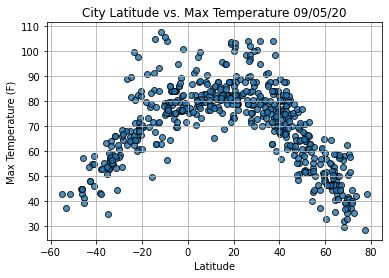

In [125]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

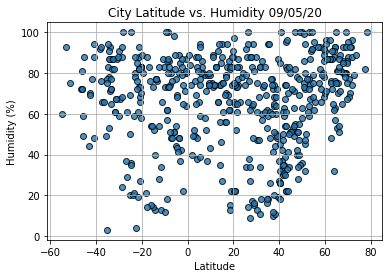

In [126]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

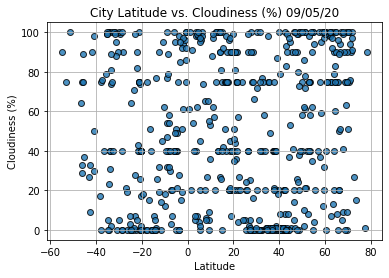

In [127]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

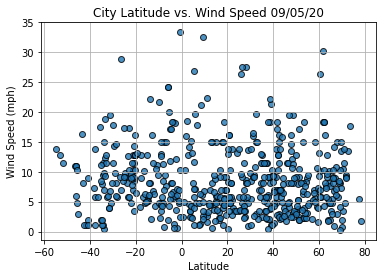

In [128]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [129]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [130]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [131]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

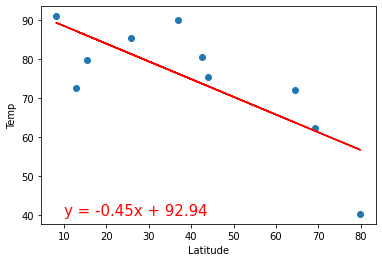

In [132]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [136]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [137]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Riverton,40.52,-111.94,80.01,26,1,9.17,US,2020-09-05 16:00:31
4,Ostrovnoy,68.05,39.51,57.97,80,41,14.94,RU,2020-09-05 15:58:37
7,Ust-Kuyga,70.02,135.60,41.88,88,51,0.69,RU,2020-09-05 16:01:32
8,Fortuna,40.60,-124.16,57.00,100,1,6.93,US,2020-09-05 16:01:32
11,Khash,28.22,61.22,75.22,17,0,8.70,IR,2020-09-05 15:58:45
...,...,...,...,...,...,...,...,...,...
550,Marrakesh,31.63,-8.01,95.00,34,75,9.17,MA,2020-09-05 16:04:03
551,Havoysund,71.00,24.66,51.80,93,94,13.87,NO,2020-09-05 16:04:04
552,Sorland,67.67,12.69,53.82,85,100,6.15,NO,2020-09-05 16:04:04
553,Taybad,34.74,60.78,75.65,18,0,12.93,IR,2020-09-05 16:04:04


In [138]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

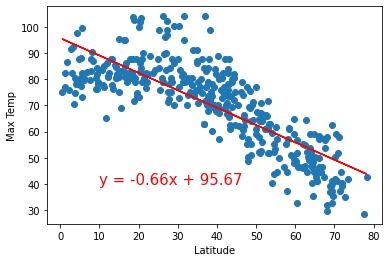

In [141]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

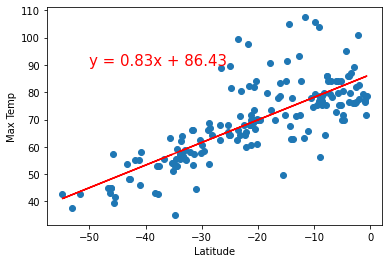

In [143]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

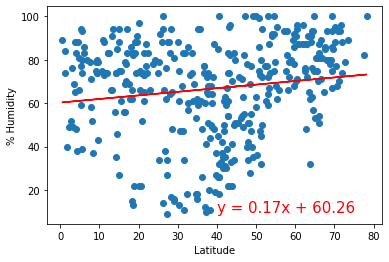

In [145]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

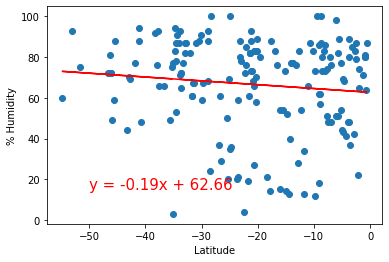

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

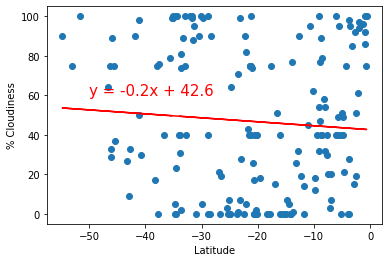

In [148]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

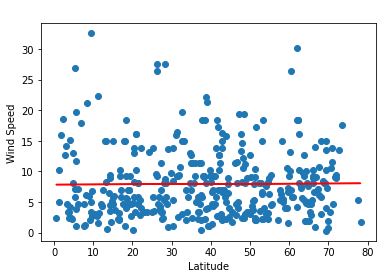

In [149]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

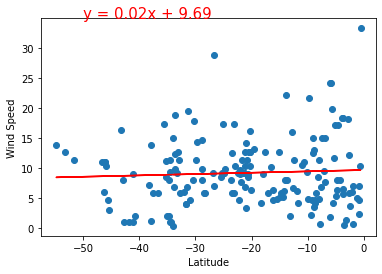

In [150]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))